In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

%matplotlib inline

C:\Users\StrikeWade\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Download and Extract MNIST dataset

In [2]:
print('Download and extract MNIST dataset!')
mnist = input_data.read_data_sets('mnist/', one_hot=True) #one_hot encoding label (e.g: 2 = [0,0,1,0,...,0])

Download and extract MNIST dataset!
Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


In [3]:
print('Type of mnist is %s' % type(mnist))
print('Number of train data is %s' % mnist.train.num_examples)
print('Number of test data is %s' % mnist.test.num_examples)

Type of mnist is <class 'tensorflow.contrib.learn.python.learn.datasets.base.Datasets'>
Number of train data is 55000
Number of test data is 10000


In [4]:
#MNIST data look like ?
train_images = mnist.train.images    #All examples in train dataset images
train_labels = mnist.train.labels    #All labels according to each example in train dataset images
test_images = mnist.test.images      #All examples in test dataset images
test_labels = mnist.test.labels      #All labels according to each example in test dataset images

print('Type of train_images is %s' % type(train_images))
print('Type of train_labels is %s' % type(train_labels))
print('Type of test_images is %s' % type(test_images))
print('Type of test_labels is %s' % type(test_labels))
print('Shape of train_images is %s' % (train_images.shape,))
print('Shape of train_labels is %s' % (train_labels.shape,))
print('Shape of test_images is %s' % (test_images.shape,))
print('Shape of test_labels is %s' % (test_labels.shape,))

Type of train_images is <class 'numpy.ndarray'>
Type of train_labels is <class 'numpy.ndarray'>
Type of test_images is <class 'numpy.ndarray'>
Type of test_labels is <class 'numpy.ndarray'>
Shape of train_images is (55000, 784)
Shape of train_labels is (55000, 10)
Shape of test_images is (10000, 784)
Shape of test_labels is (10000, 10)


In [5]:
train_images[50, :].shape

(784,)

In [6]:
current_image = np.reshape(train_images[50, :], newshape=(28,28)) #Take the 50th example of the train set and reshape to 28*28 features
print('Array shape of an example: ', train_images[50, :].shape)
print('Array shape of an example after reshape:', current_image.shape)

current_label = np.argmax(train_labels[50, :])
print('Label of the 50th example: ',current_label)

Array shape of an example:  (784,)
Array shape of an example after reshape: (28, 28)
Label of the 50th example:  8


# How does each example in dataset look like ? plot with subplots 

22410th Training Data Label is 1
13202th Training Data Label is 4
5940th Training Data Label is 7
16787th Training Data Label is 9
51518th Training Data Label is 7
9314th Training Data Label is 1
25953th Training Data Label is 4
13891th Training Data Label is 2
54092th Training Data Label is 3
12708th Training Data Label is 9
36886th Training Data Label is 4
20765th Training Data Label is 5
16271th Training Data Label is 0
2073th Training Data Label is 5
44691th Training Data Label is 7
15606th Training Data Label is 3


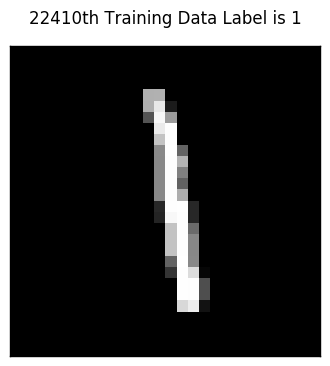

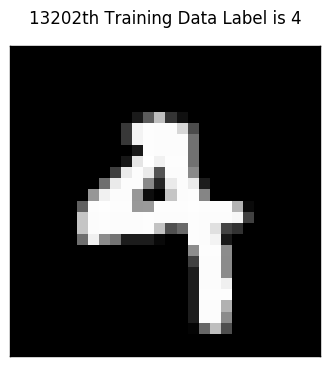

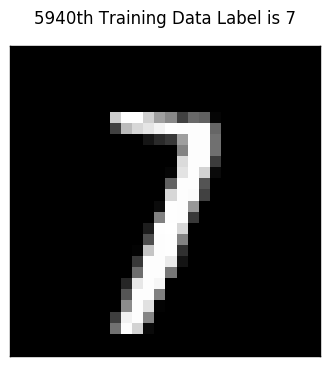

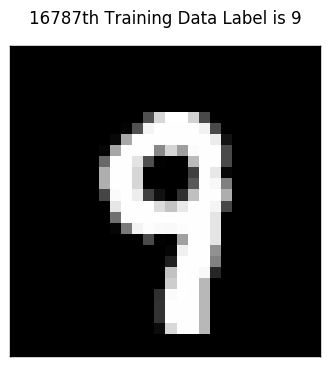

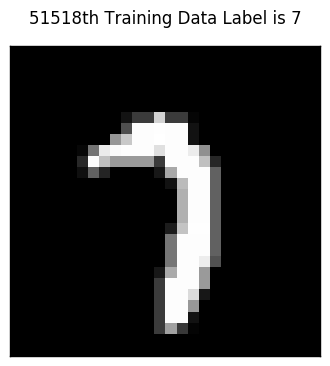

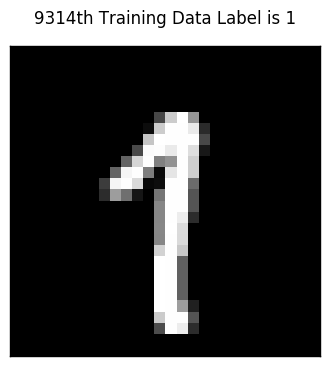

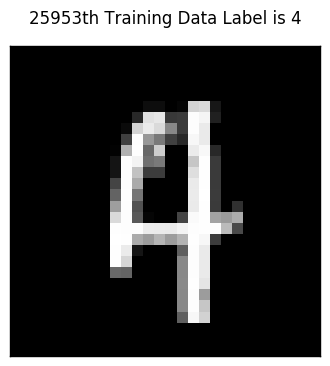

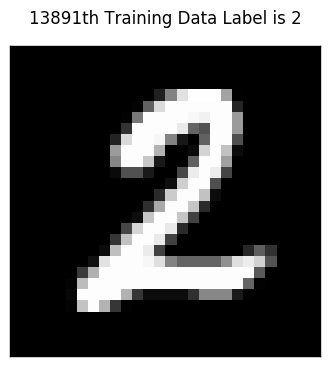

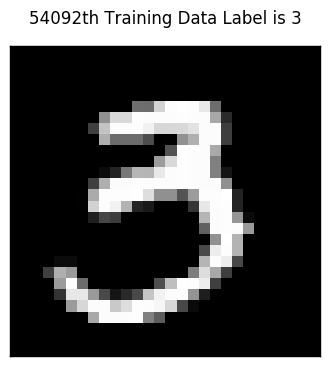

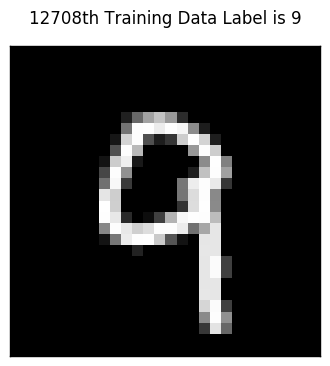

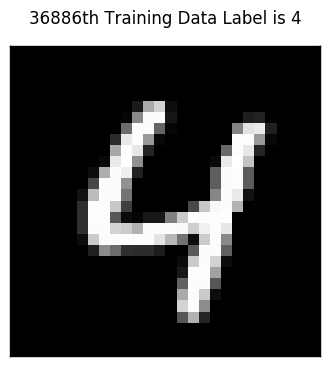

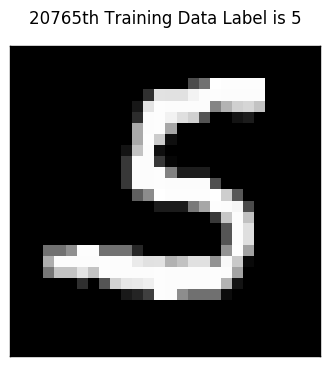

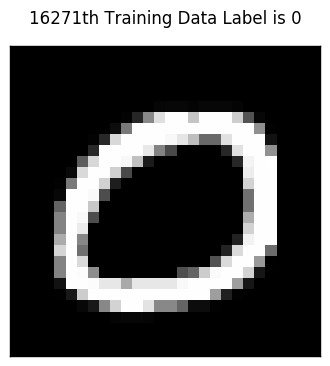

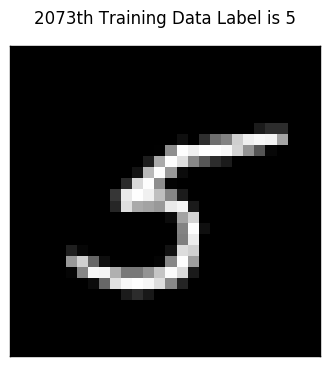

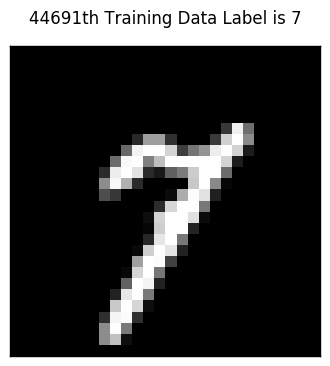

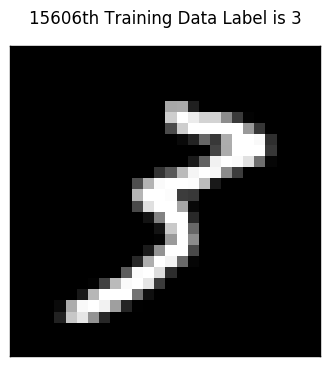

In [7]:
#How does each example in dataset look like
num_examples = 16
random_idx = np.random.randint(train_images.shape[0], size=num_examples)

for i in random_idx:
    current_image = np.reshape(train_images[i, :], newshape=(28,28)) #Reshape the array of ith example (784 features) to (28*28 features)
    current_label = np.argmax(train_labels[i, :])                    #Label of the ith example
    
    plt.matshow(current_image, cmap=plt.get_cmap('gray'))
    plt.title("" + str(i) + "th Training Data " 
              + "Label is " + str(current_label))
    plt.xticks(())
    plt.yticks(())
    print ("" + str(i) + "th Training Data " 
           + "Label is " + str(current_label))

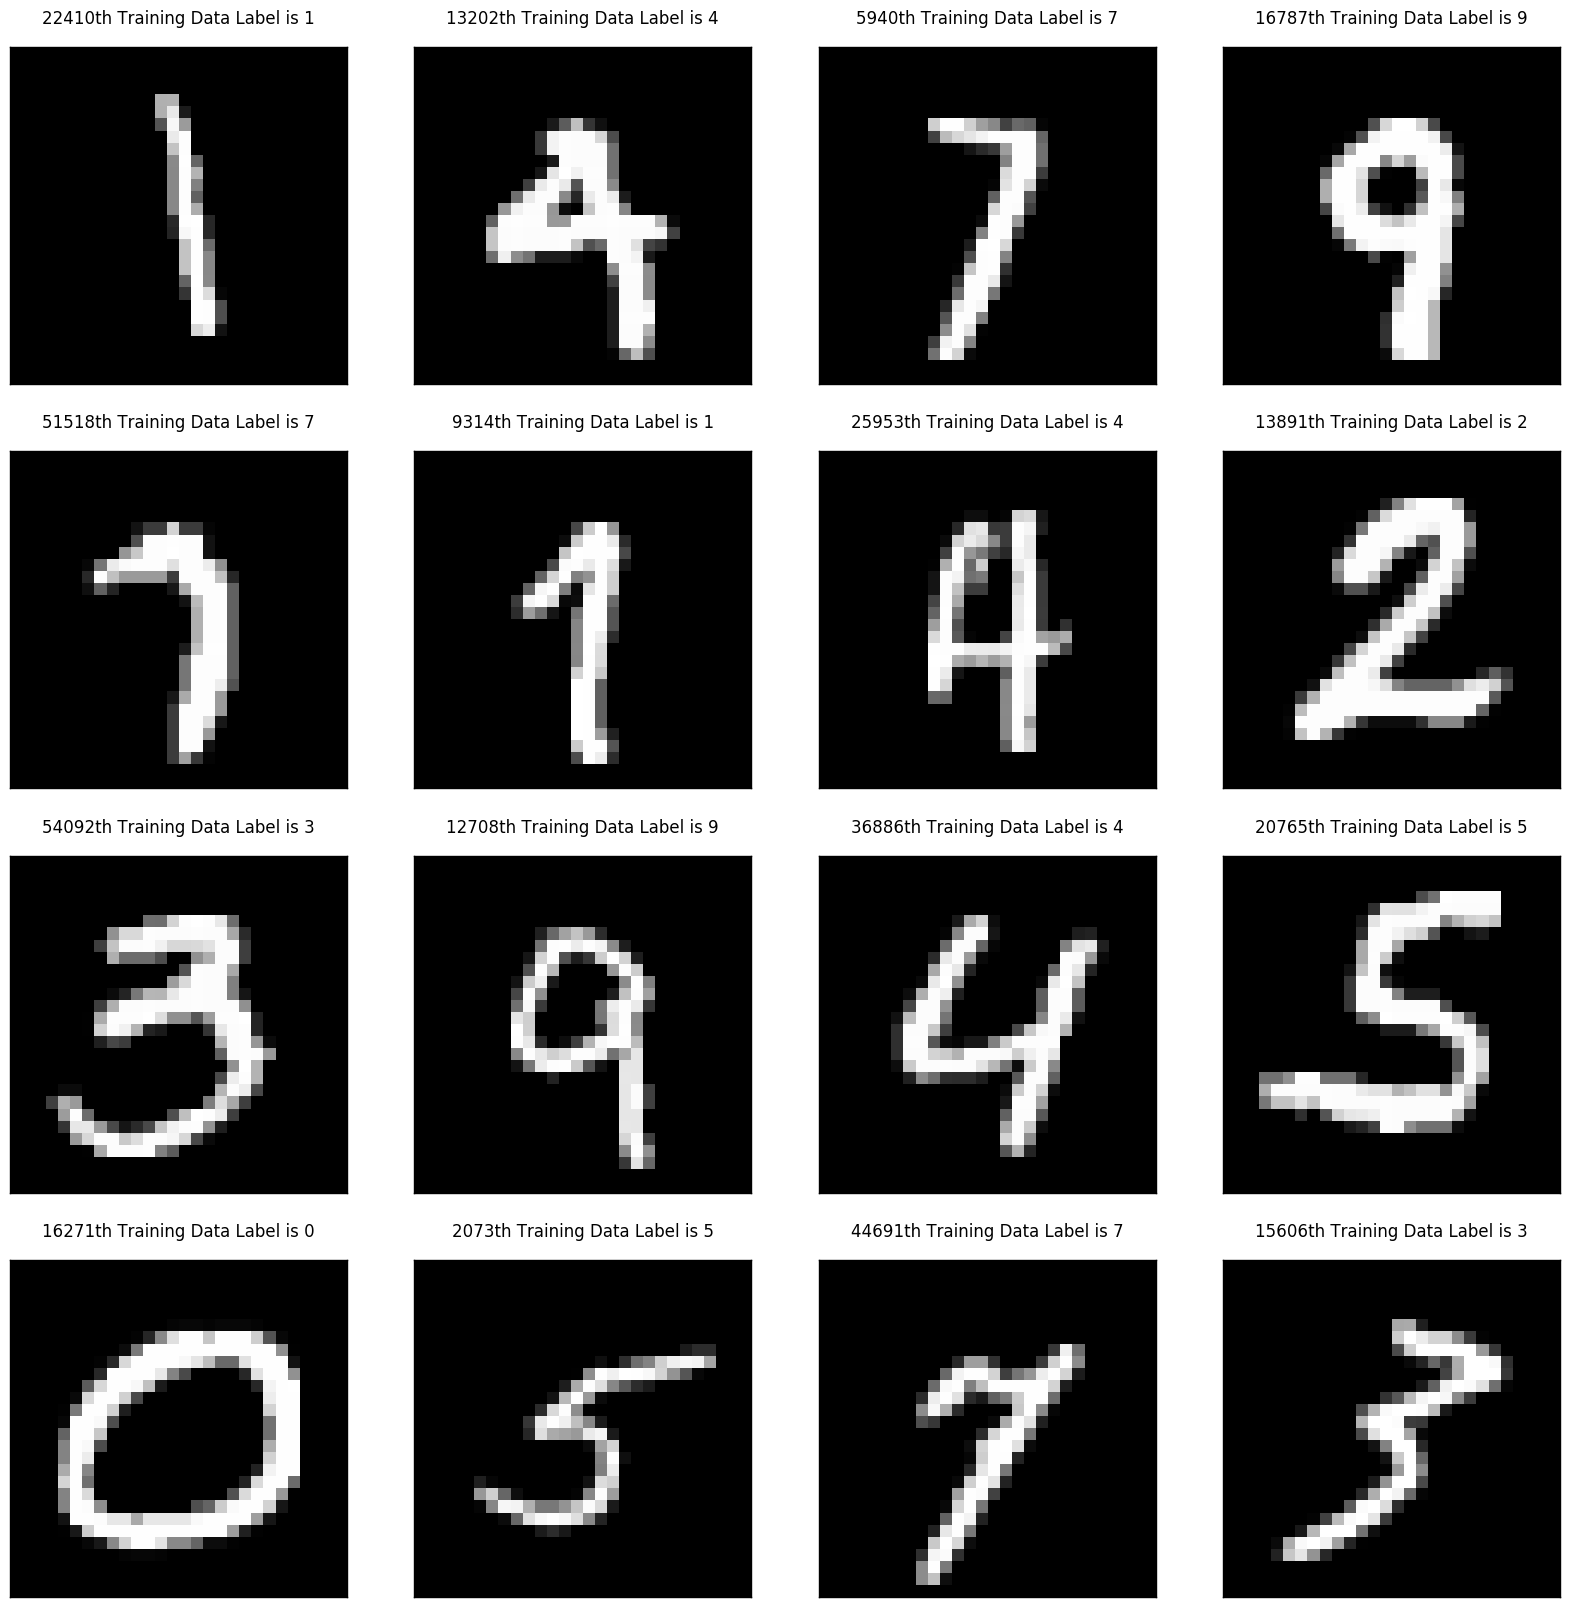

In [8]:
#Another method of subplots to show up the examples
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20,20))

for i, ax in zip(random_idx, axes.ravel()):
    #Reshape i from 1x784 -> 28*28
    current_image = np.reshape(train_images[i, :], newshape=(28,28)) #Reshape the array of ith example (784 features) to (28*28 features)
    current_label = np.argmax(train_labels[i, :])
    
    ax.matshow(current_image, cmap=plt.get_cmap('gray'))
    ax.set_title("" + str(i) + "th Training Data " + "Label is " + str(current_label))
    ax.set_xticks(()) #Remove all the ticks
    ax.set_yticks(()) #Remove all the ticks

# Batch learning

In [9]:
batch_size = 128
batch_x, batch_y = mnist.train.next_batch(batch_size)

print('Type of batch_x is: ', type(batch_x))
print('Type of batch_y is: ', type(batch_y))
print('Shape of batch_x is: ', batch_x.shape)
print('Shape of batch_y is: ', batch_y.shape)

Type of batch_x is:  <class 'numpy.ndarray'>
Type of batch_y is:  <class 'numpy.ndarray'>
Shape of batch_x is:  (128, 784)
Shape of batch_y is:  (128, 10)


In [10]:
#Get a random batch with np.random.randint
random_idx = np.random.randint(train_images.shape[0], size=batch_size)
random_idx.shape

batch_x2 = train_images[random_idx, :]
batch_y2 = train_labels[random_idx, :]

print('Type of batch_x2 is: ', type(batch_x2))
print('Type of batch_y2 is: ', type(batch_y2))
print('Shape of batch_x2 is: ', batch_x2.shape)
print('Shape of batch_y2 is: ', batch_y2.shape)

Type of batch_x2 is:  <class 'numpy.ndarray'>
Type of batch_y2 is:  <class 'numpy.ndarray'>
Shape of batch_x2 is:  (128, 784)
Shape of batch_y2 is:  (128, 10)


In [11]:
print('A random batch of 128 examples array: \n', random_idx)
print('\nShape of a random batch: ', random_idx.shape)

A random batch of 128 examples array: 
 [14378 16463 39788 36807 41371  5093 14306 19864 15652 26633 33114  5369
 18026 53900  8136 37034 10538 22628  7192 50127 23331 52600 42142 46621
 49555 29152 11816 11534 35018 39829 26105 39689 34714 22341 36706 20600
 46222 26501 52081 10552 51336 24070  5858 54449   807 48388 24904 35237
 23959 35714 37530 51111 54266 31354 51291 41974 36929 19020 44076  1629
 14655 23501 10309 39524 28798  2709 48945 20650  3720 26710  1472 22957
 21025 30375 35568 31702 11338 21378 37698 42071 24834 27324 13999  1577
 52593 34746 20893 49020 52162 31623 54894 43612 30577 44105 25007 29469
 51129 25681  6937   668 11475 41417 16136 24246 20655 39633  1616 27426
 33935  8340 53655 54033 51413 35175 40290 26658  6511 46027 25451 19402
 26761  9035 31663 48005 51670  2829 15821 35297]

Shape of a random batch:  (128,)
